In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from matplotlib.pyplot import MultipleLocator
from scipy.signal import find_peaks
from scipy.signal import butter, lfilter, filtfilt, savgol_filter
from scipy.signal import find_peaks

#Python之pandas读取Excel表格空值为nan的处理 https://blog.csdn.net/wl_Honest/article/details/99082977
#第一步選定需要比較的檔案
def coma(df):
    
    listRX1=[]
    listRX2=[]

    listRY1=[]
    listRY2=[]

    listRZ1=[]
    listRZ2=[]

    listLX1=[]
    listLX2=[]

    listLY1=[]
    listLY2=[]

    listLZ1=[]
    listLZ2=[]


    listGRX=[]
    listGRY=[]
    listGRZ=[]

    listGLX=[]
    listGLY=[]
    listGLZ=[]


    listflag_Record=[]
    listflag_one=[]
    listflag_two=[]
    listflag_three=[]

    listRtoe=[]
    listLtoe=[]

    listRX1=df.RightFootAcc_X.tolist() 
    listRY1=df.RightFootAcc_Y.tolist() 
    listRZ1=df.RightFootAcc_Z.tolist() 

    listLX1=df.LeftFootAcc_X.tolist() 
    listLY1=df.LeftFootAcc_Y.tolist() 
    listLZ1=df.LeftFootAcc_Z.tolist() 


    listGRX=df.RightFootGyro_X.tolist()
    listGRY=df.RightFootGyro_Y.tolist()
    listGRZ=df.RightFootGyro_Z.tolist()

    listGLX=df.LeftFootGyro_X.tolist()
    listGLY=df.LeftFootGyro_Y.tolist()
    listGLZ=df.LeftFootGyro_Z.tolist()

    listflag_Record=df.Record.tolist()
    listflag_one=df.Record.tolist()
    listflag_two=df.Record.tolist()
    listflag_three=df.Record.tolist()


    #去除空白
    listRX1 = [i for i in listRX1 if i != '']
    listRX2 = [i for i in listRX2 if i != '']

    listRY1 = [i for i in listRY1 if i != '']
    listRY2 = [i for i in listRY2 if i != '']

    listRZ1 = [i for i in listRZ1 if i != '']
    listRZ2 = [i for i in listRZ2 if i != '']

    listLX1 = [i for i in listLX1 if i != '']
    listLX2 = [i for i in listLX2 if i != '']

    listLY1 = [i for i in listLY1 if i != '']
    listLY2 = [i for i in listLY2 if i != '']

    listLZ1 = [i for i in listLZ1 if i != '']
    listLZ2 = [i for i in listLZ2 if i != '']

    listGRX = [i for i in listGRX if i != '']
    listGRY = [i for i in listGRY if i != '']
    listGRZ = [i for i in listGRZ if i != '']

    listGLX = [i for i in listGLX if i != '']
    listGLY = [i for i in listGLY if i != '']
    listGLZ = [i for i in listGLZ if i != '']



   

    #抓出雙腳最大承認點數
    gaitmin=0
    if(len(listRX1)<len(listLX1)):
        gaitmin=len(listRX1)
    else:
        gaitmin=len(listLX1)
    #print(gaitmin)
    #gaitmin=9600
    # #抓二級疼痛
    # for f in range(a):
    #     if(listflag_Record[f]=='2級疼痛'):
    #         listflag_Record[f]=f
    #     else:
    #         listflag_Record[f]=''
    # listflag_Record = [i for i in listflag_Record if i != '']

    #抓轉彎
    for f in range(len(listflag_Record)):
         if (f >= gaitmin):
            listflag_Record[f]=''
        
         elif(listflag_Record[f]=='轉彎'):
            listflag_Record[f]=f
        
         else:
            listflag_Record[f]=''

    listflag_Record = [i for i in listflag_Record if i != '']

    #抓一級疼痛
    for f in range(len(listflag_one)):
        
        if (f >= gaitmin):
            listflag_one[f]=''
        
        elif(listflag_one[f]=='1級疼痛'):
            listflag_one[f]=f
        
        else:
            listflag_one[f]=''

    listflag_one = [i for i in listflag_one if i != '']
    


    #抓二級疼痛
    for f in range(len(listflag_two)):
        if (f >= gaitmin):
            listflag_two[f]=''
        
        elif(listflag_two[f]=='2級疼痛'):
            listflag_two[f]=f
        
        else:
            listflag_two[f]=''
    listflag_two = [i for i in listflag_two if i != '']


    #抓三級疼痛
    for f in range(len(listflag_three)):
        if (f >= gaitmin):
            listflag_three[f]=''
        
        elif(listflag_three[f]=='3級疼痛'):
            listflag_three[f]=f
        
        else:
            listflag_three[f]=''
    listflag_three = [i for i in listflag_three if i != '']


    l=len(listRX1)
    #右腳X要乘-1
    for i in range(l):
        listRX1[i]= listRX1[i]*(-1)

    l=len(listGRZ)
    #右腳陀螺儀Z軸要乘-1
    for i in range(l):
        listGRZ[i]= listGRZ[i]*(-1)

    listRrss=[]
    for i in range(len(listRX1)): 
        listRrss.append(np.sqrt((listRX1[i] ** 2) + (listRY1[i] ** 2) + (listRZ1[i] ** 2))) 

    listLrss=[]
    for i in range(len(listLX1)): 
        listLrss.append(np.sqrt((listLX1[i] ** 2) + (listLY1[i] ** 2) + (listLZ1[i] ** 2))) 
        
    listRX1=listRX1[0:11340]
    listRY1=listRY1[0:11340]
    listRZ1=listRZ1[0:11340]
    listLX1=listLX1[0:11340]
    listLY1=listLY1[0:11340]
    listLZ1=listLZ1[0:11340]
    listflag_Record=listflag_Record[0:11340]
    listflag_one=listflag_one[0:11340]
    listflag_two=listflag_two[0:11340]
    listflag_three=listflag_three[0:11340]

    return listRX1,listRY1,listRZ1,listLX1,listLY1,listLZ1,listGRX,listflag_Record,listflag_one,listflag_two,listflag_three,listGRX,listGRY,listGRZ,listGLX,listGLY,listGLZ,listRrss,listLrss





#第一步選定需要比較的檔案
df = pd.read_excel("胡景龍.xlsx",keep_default_na=False)
listRX1,listRY1,listRZ1,listLX1,listLY1,listLZ1,listGRX,listflag_Record,listflag_one,listflag_two,listflag_three,listGRX,listGRY,listGRZ,listGLX,listGLY,listGLZ,listRrss,listLrss=coma(df)

# df = pd.read_excel("轉彎.xlsx",keep_default_na=False)
# listRX1,listRY1,listRZ1,listLX1,listLY1,listLZ1,listflag_Record=coma(df)


#
#第二步選定切割的檔案"
df = pd.read_excel("胡景龍(手動切割).xlsx",keep_default_na=False)

one=[]
two=[]
three=[]
four=[]

#one[0]為右腳第一步起始點
one=df.Rtoe_off.tolist()


#two[0]為左腳第一步起始點
two=df.Ltoe_off.tolist() 


# #three為右腳每步間距點
# for i in range(len(one)-1):
#     three.append(one[i+1]-one[i])


# #four為左腳每步間距點
# for i in range(len(two)-1):
#     four.append(two[i+1]-two[i])



# print("右腳總步數")
# print(len(three)+1)
# #右腳:可以讓(後減前)=剩餘位置
# print("右腳每步間距")
# print(three)
# print("=====================================================================================================================================")

# print("左腳總步數")
# print(len(four)+1)
# #左腳:可以讓(後減前)=剩餘位置 
# print("左腳每步間距")
# print(four)
# print("=====================================================================================================================================")


if(len(listflag_Record)%2!=0):
    print("請先手動輸入補差值")
    print("=====================================================================================================================================")
    print("轉彎位置")
    print(listflag_Record)

# print(listflag_one)
# print(listflag_two)
# print(listflag_three)



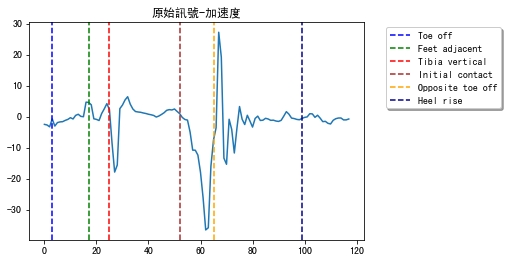

In [11]:
plt.title("原始訊號-加速度")
plt.plot(listRX1[182:300])
#plt.plot(listLX1[182:300])
plt.axvline(x=3,c='b',linestyle="--",label='Toe off')
plt.axvline(x=17,c='g',linestyle="--",label='Feet adjacent')
plt.axvline(x=25,c='r',linestyle="--",label='Tibia vertical')
plt.axvline(x=52,c='brown',linestyle="--",label='Initial contact')
plt.axvline(x=65,c='orange',linestyle="--",label='Opposite toe off')
plt.axvline(x=99,c='darkblue',linestyle="--",label='Heel rise')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left' ,shadow=True)
plt.savefig("原始訊號-加速度", facecolor='white', bbox_inches='tight', pad_inches=0.1)
plt.show()


# plt.title("原始訊號-陀螺儀")
# plt.plot(listGRX[182:300])
# plt.savefig("原始訊號-陀螺儀", facecolor='white', bbox_inches='tight', pad_inches=0.1)
# plt.show()



In [12]:
#記錄每一步的起始點到終點 [one,two,......] %2==0:為當步起始點 %2==1:為當步終點 two-one+1因為頭尾都要算所以要+1
R_gait=[]
R_flag_gait=[]
#紀錄到底幾步
Rgait=0

for i in range(len(one)-1):
    
    R_first_gait=one[i]
    R_secend_gait=one[i+1]
    Rgait=Rgait+1
    #if(Rgait != 44 and Rgait != 111 and Rgait != 157 and Rgait != 226):
        #print(Rgait)
    R_gait.append(R_first_gait)
    R_gait.append(R_secend_gait-1)
    R_flag_gait.append(i)
    print("第"+str(Rgait)+"步:"+str(R_first_gait)+"到"+str(R_secend_gait-1))
    print("總距離"+str(R_secend_gait-R_first_gait))
    print("=====")
    
    # print(R_secend_gait)
    # print(i)

    #確定步態位置
    # if( Rgait>67 and Rgait <77):
    #     print("第"+str(Rgait)+"步:"+str(R_first_gait)+"到"+str(R_secend_gait))
    #     print("距離"+str(R_secend_gait-R_first_gait))
    #     print("=====")

    # if(len(three)-2==i):
    #     R_first_gait=one+three[i+1]
    #     Rgait=Rgait+1
    #     #print("第"+str(Rgait)+"步:"+str(R_first_gait))
    
#確認轉彎陣列紀錄   
#print(len(R_gait)/2)
print(Rgait)


第1步:183到295
總距離113
=====
第2步:296到399
總距離104
=====
第3步:400到503
總距離104
=====
第4步:504到611
總距離108
=====
第5步:612到719
總距離108
=====
第6步:720到826
總距離107
=====
第7步:827到934
總距離108
=====
第8步:935到1043
總距離109
=====
第9步:1044到1153
總距離110
=====
第10步:1154到1263
總距離110
=====
第11步:1264到1372
總距離109
=====
第12步:1373到1483
總距離111
=====
第13步:1484到1593
總距離110
=====
第14步:1594到1700
總距離107
=====
第15步:1701到1806
總距離106
=====
第16步:1807到1914
總距離108
=====
第17步:1915到2023
總距離109
=====
第18步:2024到2133
總距離110
=====
第19步:2134到2243
總距離110
=====
第20步:2244到2354
總距離111
=====
第21步:2355到2466
總距離112
=====
第22步:2467到2576
總距離110
=====
第23步:2577到2688
總距離112
=====
第24步:2689到2799
總距離111
=====
第25步:2800到2910
總距離111
=====
第26步:2911到3021
總距離111
=====
第27步:3022到3132
總距離111
=====
第28步:3133到3245
總距離113
=====
第29步:3246到3359
總距離114
=====
第30步:3360到3474
總距離115
=====
第31步:3475到3584
總距離110
=====
第32步:3585到3695
總距離111
=====
第33步:3696到3808
總距離113
=====
第34步:3809到3918
總距離110
=====
第35步:3919到4031
總距離113
=====
第36步:4032到4144
總距離113
=====
第37步:4145到4256
總

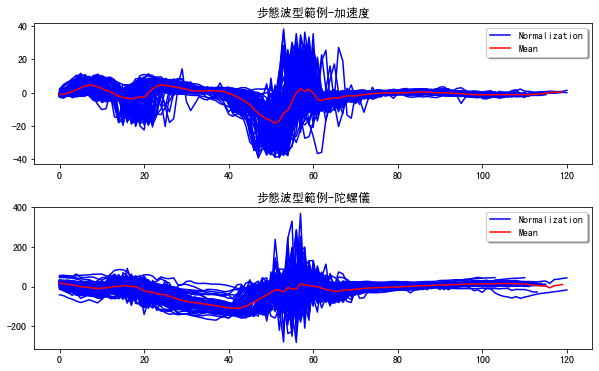

In [13]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,6))
plt.subplots_adjust(hspace=0.3)

tst=[]
tstflag=[]
for i in range(130):
    tst.append(0)
    tstflag.append(0)

for i in range(0,len(R_gait)-1,2):
    plt.title("步態波型範例-加速度") 
    if (i==0):
        ax1.plot(listRX1[R_gait[i]:R_gait[i+1]],c='b', label='Normalization') 
    else:
        ax1.plot(listRX1[R_gait[i]:R_gait[i+1]],c='b') 
    x=listRX1[R_gait[i]:R_gait[i+1]]
    for j in range(len (x)):
        tst[j]=tst[j]+x[j]
        tstflag[j]=tstflag[j]+1
for i in range(130):
    if(tst[i]!=0):
        tst[i]=tst[i]/tstflag[i]
#plt.xlim[:120]
ax1.set_title("步態波型範例-加速度") 
ax1.plot(tst[:120],c='r', label='Mean') 
ax1.legend(loc='upper right' ,shadow=True)

#ax1.savefig("步態波型範例-加速度", facecolor='white', bbox_inches='tight', pad_inches=0.1)


tst=[]
tstflag=[]
for i in range(130):
    tst.append(0)
    tstflag.append(0)

for i in range(0,len(R_gait)-1,2):
    ax2.set_title("步態波型範例-陀螺儀") 
    if (i==0):
        ax2.plot(listGRX[R_gait[i]:R_gait[i+1]],c='b', label='Normalization') 
    else:
        ax2.plot(listGRX[R_gait[i]:R_gait[i+1]],c='b') 
    x=listGRX[R_gait[i]:R_gait[i+1]]
    for j in range(len (x)):
        tst[j]=tst[j]+x[j]
        tstflag[j]=tstflag[j]+1
for i in range(130):
    if(tst[i]!=0):
        tst[i]=tst[i]/tstflag[i]
#plt.xlim[:120]
#plt.title("步態波型範例-陀螺儀") 
ax2.plot(tst[:120],c='r', label='Mean') 
ax2.legend(loc='upper right' ,shadow=True)

plt.savefig("步態波型範例", facecolor='white', bbox_inches='tight', pad_inches=0.1)
#plt.show()




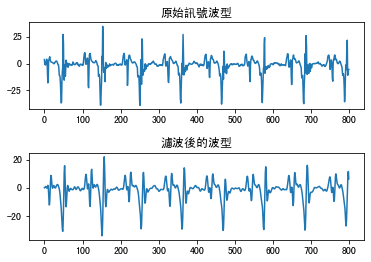

In [14]:
import numpy as np
from scipy import signal

fig, (ax1, ax2) = plt.subplots(2, 1)
plt.subplots_adjust(hspace=0.5)
ax1.plot(listRX1[200:1000])
ax1.set_title('原始訊號波型')
# 设计 Butterworth 低通滤波器
order = 5
fs = 100.0 # 采样频率
cutoff = 15.0 # 截止频率，单位 Hz
nyq = 0.5 * fs
normal_cutoff = cutoff / nyq
b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)

# 将滤波器应用于原始信号
filtered = signal.lfilter(b, a, listRX1[200:1000])
ax2.plot(filtered)
ax2.set_title('濾波後的波型')
plt.savefig("Butterworth範例", facecolor='white', bbox_inches='tight', pad_inches=0.1)
#ax2.set_xlabel('Time [seconds]')
plt.show()

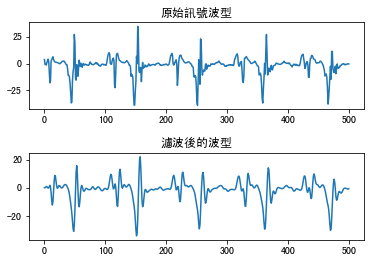

In [15]:
import numpy as np
from scipy import signal

fig, (ax1, ax2) = plt.subplots(2, 1)
plt.subplots_adjust(hspace=0.5)
ax1.plot(listRX1[200:700])
ax1.set_title('原始訊號波型')
# 设计 Butterworth 低通滤波器
order = 5
fs = 100.0 # 采样频率
cutoff = 15.0 # 截止频率，单位 Hz
nyq = 0.5 * fs
normal_cutoff = cutoff / nyq
b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)

# 将滤波器应用于原始信号
filtered = signal.lfilter(b, a, listRX1[200:700])
ax2.plot(filtered)
ax2.set_title('濾波後的波型')
plt.savefig("Butterworth範例", facecolor='white', bbox_inches='tight', pad_inches=0.1)
#ax2.set_xlabel('Time [seconds]')



plt.show()

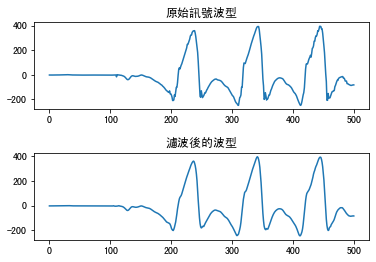

In [16]:

fig, (ax1, ax2) = plt.subplots(2, 1)
plt.subplots_adjust(hspace=0.5)
ax1.plot(listGRZ[:500])
ax1.set_title('原始訊號波型')
# 设计 Butterworth 低通滤波器

# 将滤波器应用于原始信号
flistGRZ= savgol_filter(listGRZ,10,3)
ax2.plot(flistGRZ[:500])
ax2.set_title('濾波後的波型')
plt.savefig("SG範例", facecolor='white', bbox_inches='tight', pad_inches=0.1)
#ax2.set_xlabel('Time [seconds]')
plt.show()

In [17]:
def NormaliseCrossCorrelation(a,v):
    M = len(a)
    N = len(v)

    if type(a) is list: 
        a = np.array(a)
    if type(v) is list: 
        v = np.array(v)
    
    v_mu = np.mean(v)

    ncc_series = []
    for i in range(M-N+1):
        _a = a[i:i+N]
        a_sum = _a - np.mean(_a)
        v_sum = v - v_mu
        nr = 1/N * np.sum(a_sum*v_sum) / np.sqrt(np.var(_a)*np.var(v))
        ncc_series.append(nr)

    return ncc_series

def NormaliseCrossConvolution(a,v):
    M = len(a)
    N = len(v)

    if type(a) is list: 
        a = np.array(a)
    if type(v) is list: 
        v = np.array(v)
    
    v_mean = np.mean(v)
    v_normalized = v - v_mean
    a_normalized = a - np.mean(a)
    
    corr = np.convolve(a_normalized, v_normalized[::-1], mode='full')
    corr /= np.sqrt(np.sum(np.square(a_normalized)) * np.sum(np.square(v_normalized)))
    return corr








In [ ]:
#林O民站存程式碼

for i in range(len(Lfeet_peaks)):
    if(i!=0 and i%2==0):
    #if( i%2==0):
        listL_feet.append(Lfeet_peaks[i])
# print("前600=====================")
# print(listL_feet)
# print("=====================")

# Lfeet=np.array(oppo_listGLZ[5000:5400])
# #判斷用Lfeet=np.array(oppo_listGLZ[3000:4000])
# Lfeet_peaks, _= find_peaks(Lfeet,height=0,distance=20)
# # plt.title("左腳feet_adjacent")
# # plt.plot(Lfeet)
# # plt.plot(Lfeet_peaks, Lfeet[Lfeet_peaks],"*")
# # plt.show()

# # print(Lfeet_peaks)


# for i in range(len(Lfeet_peaks)):
#     #if(i!=0 and i%2==0):
#     if( i%2==1):
#         listL_feet.append(Lfeet_peaks[i]+5000)


# Lfeet=np.array(oppo_listGLZ[5400:9600])
# #Lfeet=np.array(oppo_listGLZ[6000:7000])
# #判斷用Lfeet=np.array(oppo_listGLZ[3000:4000])
# Lfeet_peaks, _= find_peaks(Lfeet,height=50,distance=20)
# # plt.title("左腳feet_adjacent")
# # plt.plot(Lfeet)
# # plt.plot(Lfeet_peaks, Lfeet[Lfeet_peaks],"*")
# # plt.show()
# # plt.plot(listGLZ[6000:7000])
# # plt.show()
# # print(Lfeet_peaks)


# for i in range(len(Lfeet_peaks)):
#     #if(i!=0 and i%2==0):
#     if( i%2==1):
#         listL_feet.append(Lfeet_peaks[i]+5400)


# print(listL_feet)
# # print(Lfeet_peaks[0:10])


# Lfeet=np.array(oppo_listGLZ[9500:10000])
# #Lfeet=np.array(oppo_listGLZ[6000:7000])
# #判斷用Lfeet=np.array(oppo_listGLZ[3000:4000])
# Lfeet_peaks, _= find_peaks(Lfeet,distance=20)
# plt.title("左腳feet_adjacent")
# plt.plot(Lfeet)
# plt.plot(Lfeet_peaks, Lfeet[Lfeet_peaks],"*")
# plt.show()
# plt.plot(listGLZ[9500:10000])
# plt.show()
# print(Lfeet_peaks)



if(total_min>len(listL_feet)):
     total_min=len(listL_feet)

# print("後400=====================")
# print(listL_feet)
# print("=====================")

# Lfeet=np.array(oppo_listGLZ[:1000])
# #判斷用Lfeet=np.array(oppo_listGLZ[3000:4000])
# Lfeet_peaks, _= find_peaks(Lfeet,height=80,distance=20)
# plt.title("左腳feet_adjacent")
# plt.plot(Lfeet)
# plt.plot(Lfeet_peaks, Lfeet[Lfeet_peaks],"*")
# plt.show()
#print(listL_feet)

# plt.plot(listGLZ[:1000])
# plt.show()

